In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) 

In [118]:
# Φόρτωση του dataset
file_path = '../data/train.csv' 
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"The file '{file_path}' was not found.")

   

Dataset loaded successfully!


In [119]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [120]:
print("First 5 Rows Check:")
print(df.head())

print("\nDataset Info Check:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nDescriptive Statistics (all columns):")
print(df.describe(include='all'))

print("\nMissing value check:")
print(df.isnull().sum())

print("\nDuplicate row check:")
print(df.duplicated().sum())

First 5 Rows Check:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Pr

1) Missing Values:Postal Code has 11 missing values.
2) Order Date and Ship Date were identified as object (string).We need to convert them to datetime objects to perform date calculations.
3) The result of df.duplicated().sum() being 0 is very good.
4) Row ID is simply a row It has no analytical value and can be ignored or removed.
5) The Country has only 1 unique value United States

In [121]:

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
print("The 'Order Date' and 'Ship Date' columns were converted to datetime.")

df.dropna(subset=['Postal Code'], inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int) 

df['Order_Year'] = df['Order Date'].dt.year

df['Order_Month'] = df['Order Date'].dt.month

df['Order_Day'] = df['Order Date'].dt.day

df['Shipping_Duration_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print("\nΝέα χαρακτηριστικά δημιουργήθηκαν: 'Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Duration_Days'.")

df.info()


The 'Order Date' and 'Ship Date' columns were converted to datetime.

Νέα χαρακτηριστικά δημιουργήθηκαν: 'Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Duration_Days'.
<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Row ID                  9789 non-null   int64         
 1   Order ID                9789 non-null   object        
 2   Order Date              9789 non-null   datetime64[ns]
 3   Ship Date               9789 non-null   datetime64[ns]
 4   Ship Mode               9789 non-null   object        
 5   Customer ID             9789 non-null   object        
 6   Customer Name           9789 non-null   object        
 7   Segment                 9789 non-null   object        
 8   Country                 9789 non-null   object        
 9   City                    9789 non-null   object        
 10  

In [122]:
df = df.drop('Row ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                9789 non-null   object        
 1   Order Date              9789 non-null   datetime64[ns]
 2   Ship Date               9789 non-null   datetime64[ns]
 3   Ship Mode               9789 non-null   object        
 4   Customer ID             9789 non-null   object        
 5   Customer Name           9789 non-null   object        
 6   Segment                 9789 non-null   object        
 7   Country                 9789 non-null   object        
 8   City                    9789 non-null   object        
 9   State                   9789 non-null   object        
 10  Postal Code             9789 non-null   int64         
 11  Region                  9789 non-null   object        
 12  Product ID              9789 non-null   object       

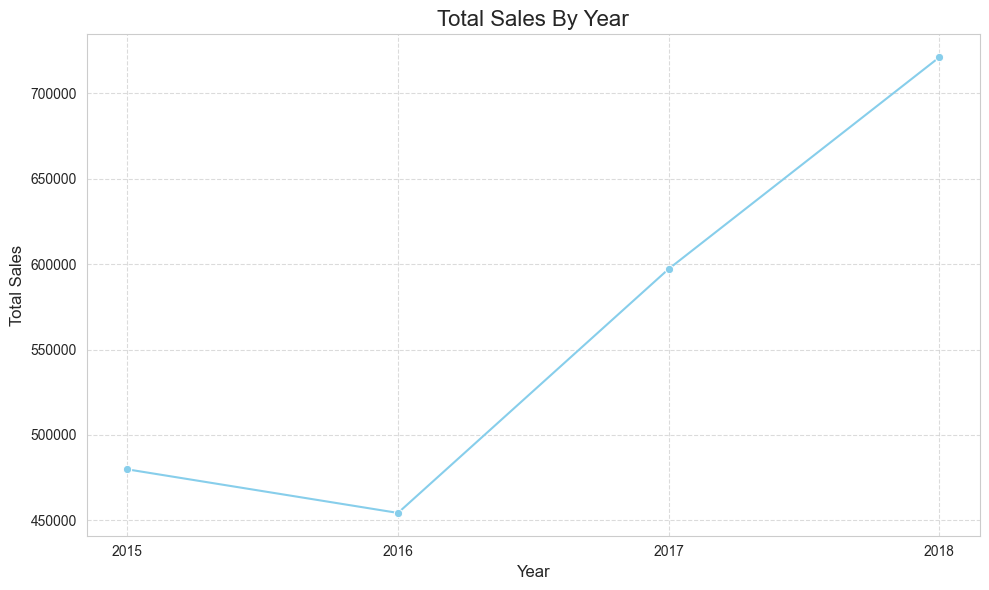

Total Sales By Year:
   Order_Year        Sales
0        2015  479856.2081
1        2016  454315.9054
2        2017  597225.4900
3        2018  721209.8092


In [123]:
yearly_sales = df.groupby('Order_Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Year', y='Sales', data=yearly_sales, marker='o', color='skyblue')
plt.title('Total Sales By Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(yearly_sales['Order_Year'], fontsize=10) 
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Total Sales By Year:")
print(yearly_sales)

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/3472848761.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Month_Name', y='Sales', data=monthly_sales, palette='viridis')


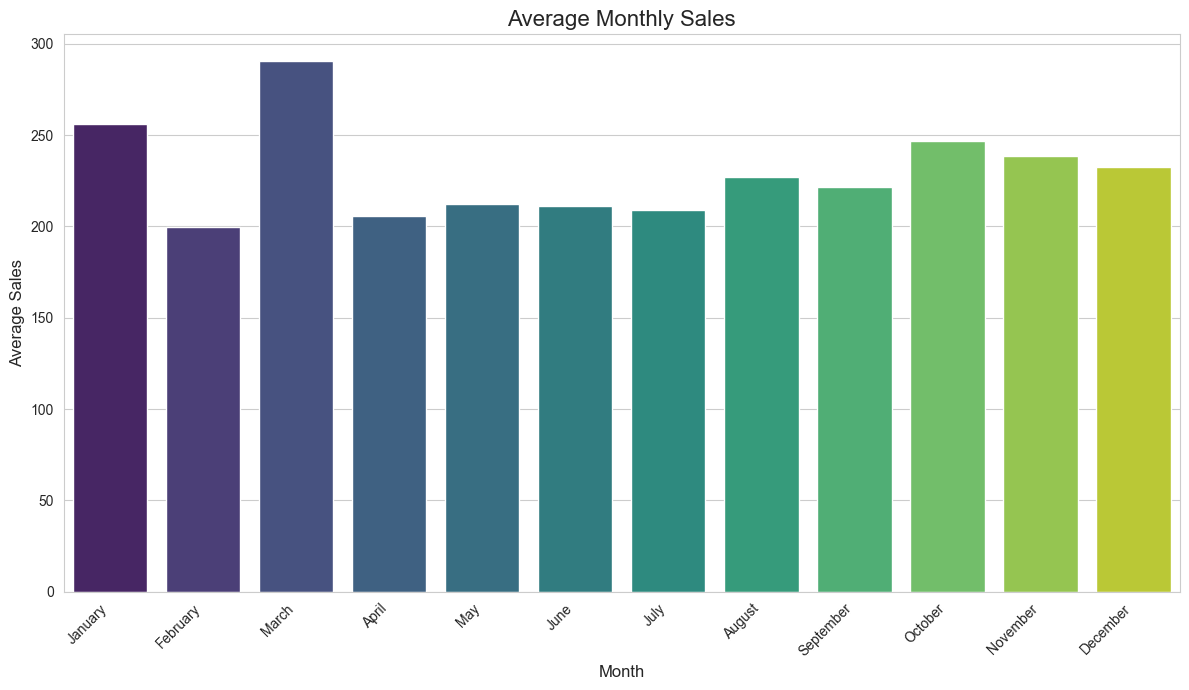

Average Monthly Sales:
   Order_Month_Name       Sales
0           January  256.217659
1          February  199.902745
2             March  290.549393
3             April  205.774772
4               May  212.533412
5              June  211.052856
6              July  208.802997
7            August  227.007110
8         September  221.642106
9           October  246.596162
10         November  238.453083
11         December  232.639493


In [124]:
monthly_sales = df.groupby('Order_Month')['Sales'].mean().reset_index()
monthly_sales['Order_Month_Name'] = monthly_sales['Order_Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_sales['Order_Month_Name'] = pd.Categorical(monthly_sales['Order_Month_Name'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Order_Month_Name')

plt.figure(figsize=(12, 7))
sns.barplot(x='Order_Month_Name', y='Sales', data=monthly_sales, palette='viridis')
plt.title('Average Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Περιστροφή ετικετών για καλύτερη αναγνωσιμότητα
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Average Monthly Sales:")
print(monthly_sales[['Order_Month_Name', 'Sales']])

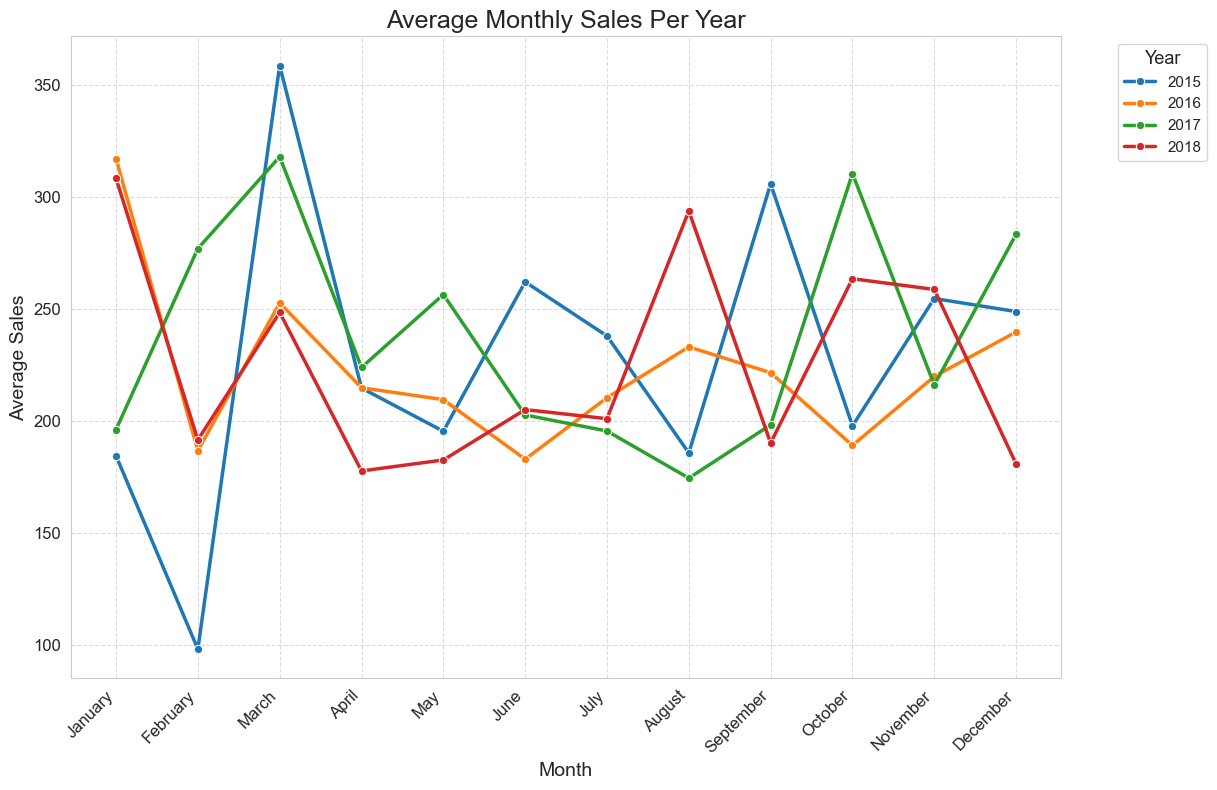


Average Monthly Sales Per Year:
    Order_Year  Order_Month       Sales Order_Month_Name
0         2015            1  184.489701          January
1         2015            2   98.258522         February
2         2015            3  358.479201            March
3         2015            4  214.668115            April
4         2015            5  195.407463              May
5         2015            6  262.007142             June
6         2015            7  237.898190             July
7         2015            8  185.736551           August
8         2015            9  305.706093        September
9         2015           10  197.820082          October
10        2015           11  254.600198         November
11        2015           12  248.784885         December
12        2016            1  316.964168          January
13        2016            2  186.740797         February
14        2016            3  252.650925            March
15        2016            4  214.807978            Apri

In [125]:
monthly_yearly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].mean().reset_index()
monthly_yearly_sales['Order_Month_Name'] = monthly_yearly_sales['Order_Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_yearly_sales['Order_Month_Name'] = pd.Categorical(monthly_yearly_sales['Order_Month_Name'], categories=month_order, ordered=True)
monthly_yearly_sales = monthly_yearly_sales.sort_values(by=['Order_Year', 'Order_Month_Name'])


plt.figure(figsize=(14, 8))
sns.lineplot(x='Order_Month_Name', y='Sales', hue='Order_Year', data=monthly_yearly_sales, marker='o', palette='tab10', linewidth=2.5)
plt.title('Average Monthly Sales Per Year', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1]) 
plt.show()

print("\nAverage Monthly Sales Per Year:")
print(monthly_yearly_sales) 

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/1346458915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='magma')


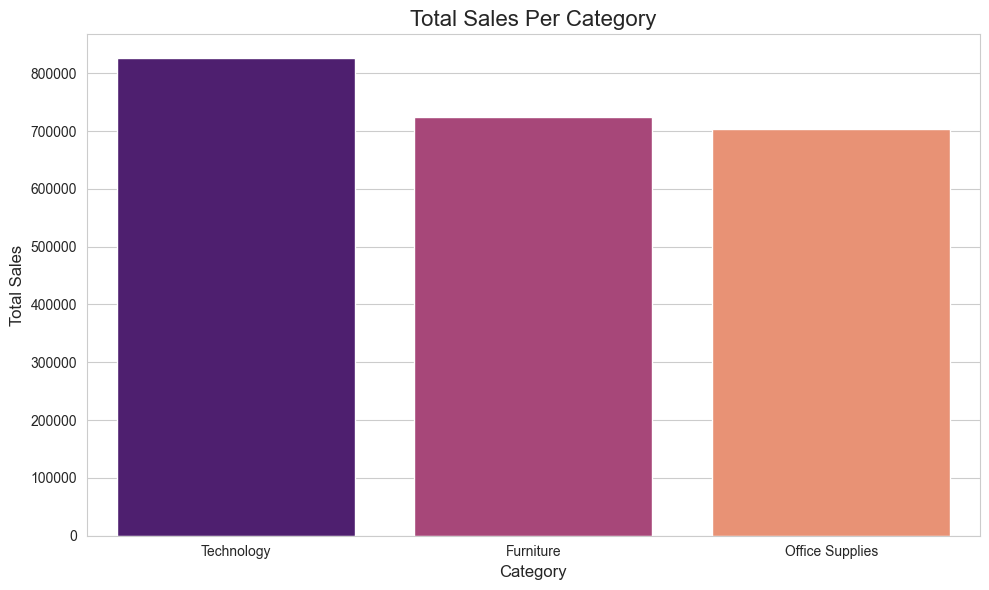

Total Sales Per Category:
          Category        Sales
0       Technology  825856.1130
1        Furniture  723538.4757
2  Office Supplies  703212.8240


In [126]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='magma')
plt.title('Total Sales Per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Total Sales Per Category:")
print(sales_by_category)

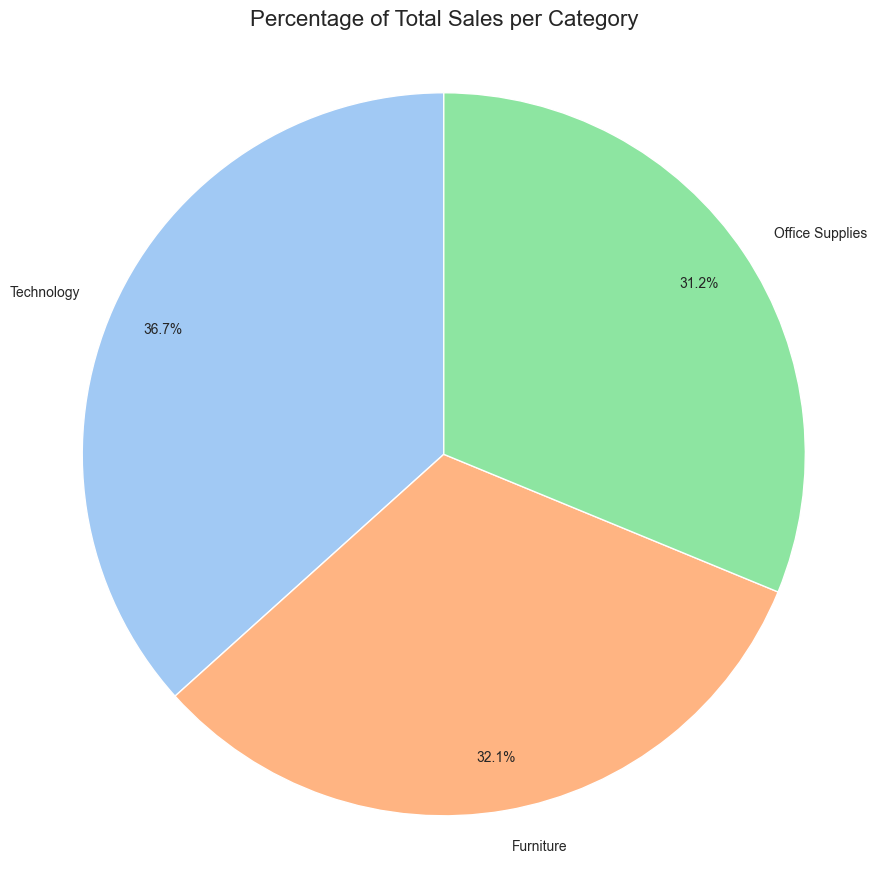

Percentage of Total Sales per Category:
          Category        Sales  Percentage
2       Technology  825856.1130   36.662230
0        Furniture  723538.4757   32.120043
1  Office Supplies  703212.8240   31.217727


In [127]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
total_sales = category_sales['Sales'].sum()
category_sales['Percentage'] = (category_sales['Sales'] / total_sales) * 100
category_sales = category_sales.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(9, 9)) 
plt.pie(category_sales['Percentage'],
        labels=category_sales['Category'],
        autopct='%1.1f%%', 
        startangle=90,     
        colors=sns.color_palette('pastel'), 
        pctdistance=0.85)  
plt.title('Percentage of Total Sales per Category', fontsize=16)
plt.axis('equal') 
plt.tight_layout()
plt.show()

print("Percentage of Total Sales per Category:")
print(category_sales)

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/2410365528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sub-Category', data=sales_by_subcategory, palette='rocket')


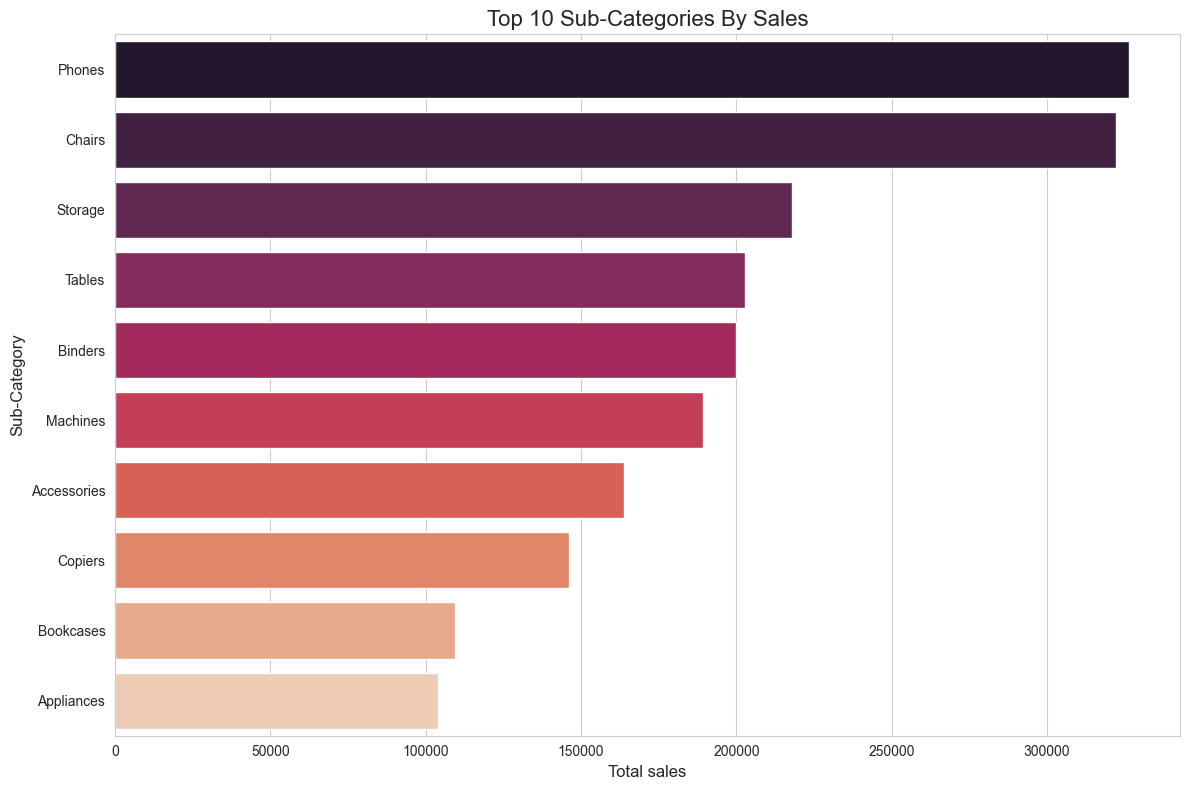

Top 10 Sub-Categories:
  Sub-Category        Sales
0       Phones  326487.6980
1       Chairs  322107.5310
2      Storage  217779.1020
3       Tables  202810.6280
4      Binders  200028.7850
5     Machines  189238.6310
6  Accessories  163881.6900
7      Copiers  146248.0940
8    Bookcases  109408.2987
9   Appliances  104075.4630


In [128]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().nlargest(10).sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', data=sales_by_subcategory, palette='rocket')
plt.title('Top 10 Sub-Categories By Sales', fontsize=16)
plt.xlabel('Total sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Top 10 Sub-Categories:")
print(sales_by_subcategory)

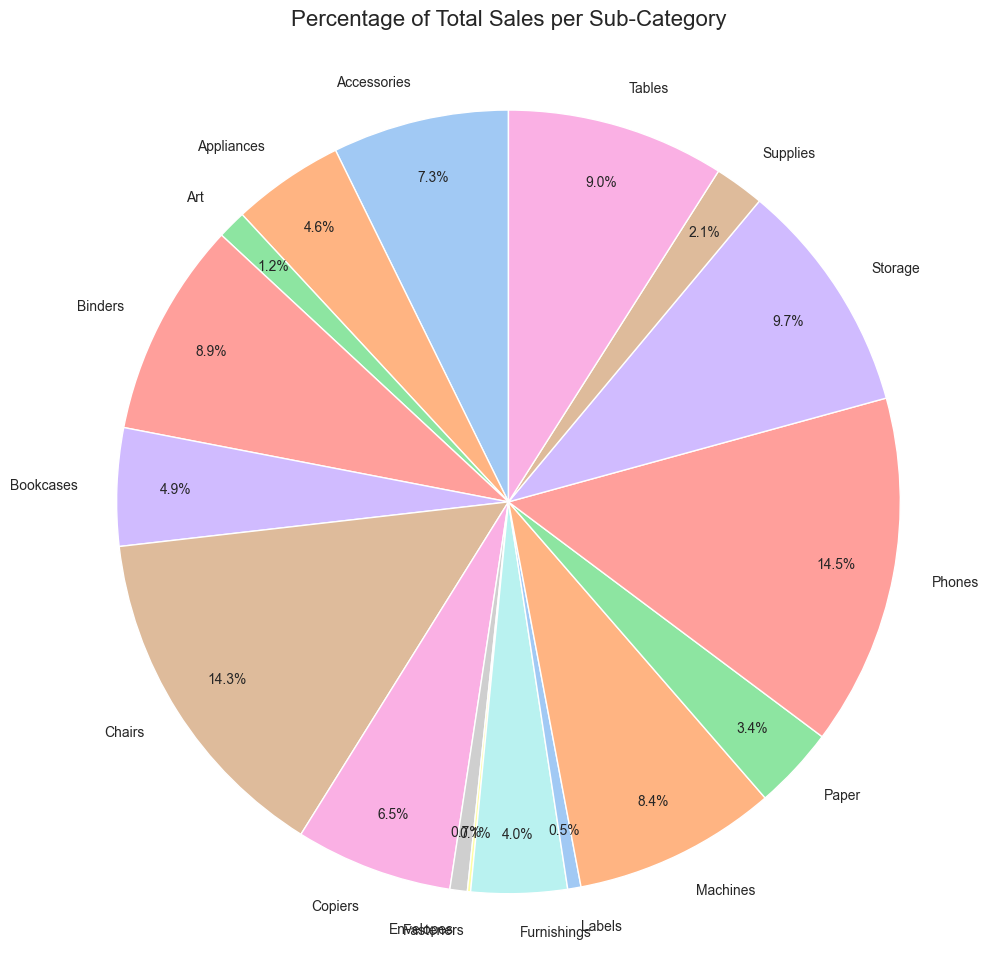

Percentage of Total Sales per Sub-Category:
   Sub-Category        Sales  Percentage
13       Phones  326487.6980   14.493768
5        Chairs  322107.5310   14.299319
14      Storage  217779.1020    9.667868
16       Tables  202810.6280    9.003372
3       Binders  200028.7850    8.879878
11     Machines  189238.6310    8.400870
0   Accessories  163881.6900    7.275200
6       Copiers  146248.0940    6.492392
4     Bookcases  109408.2987    4.856963
1    Appliances  104075.4630    4.620222
9   Furnishings   89212.0180    3.960389
12        Paper   76736.1040    3.406546
15     Supplies   46420.3080    2.060737
2           Art   26697.3700    1.185176
7     Envelopes   16126.0060    0.715882
10       Labels   12347.7260    0.548153
8     Fasteners    3001.9600    0.133266


In [129]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
total_sales = sub_category_sales['Sales'].sum()
sub_category_sales['Percentage'] = (sub_category_sales['Sales'] / total_sales) * 100
sub_ategory_sales = sub_category_sales.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(10, 10)) 
plt.pie(sub_category_sales['Percentage'],
        labels=sub_category_sales['Sub-Category'],
        autopct='%1.1f%%', 
        startangle=90,     
        colors=sns.color_palette('pastel'), 
        pctdistance=0.85)  
plt.title('Percentage of Total Sales per Sub-Category', fontsize=16)
plt.axis('equal') 
plt.tight_layout()
plt.show()

print("Percentage of Total Sales per Sub-Category:")
print(sub_category_sales.sort_values(by= 'Percentage',ascending=False))

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/1451468084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Customer Name', data=top_10_customers, palette='crest')


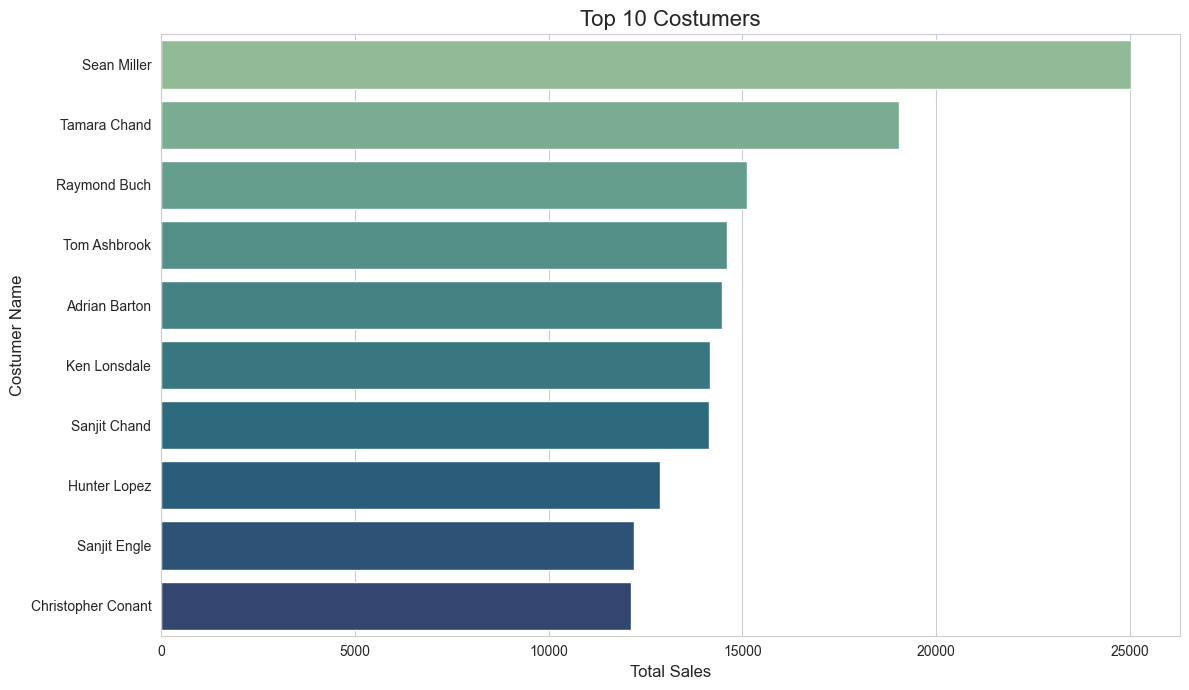


Top 10 Costumers:
        Customer Name      Sales
0         Sean Miller  25043.050
1        Tamara Chand  19052.218
2        Raymond Buch  15117.339
3        Tom Ashbrook  14595.620
4       Adrian Barton  14473.571
5        Ken Lonsdale  14175.229
6        Sanjit Chand  14142.334
7        Hunter Lopez  12873.298
8        Sanjit Engle  12209.438
9  Christopher Conant  12129.072


In [130]:
top_10_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10).sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Sales', y='Customer Name', data=top_10_customers, palette='crest')
plt.title('Top 10 Costumers', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Costumer Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\nTop 10 Costumers:")
print(top_10_customers)

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/2743241736.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product_Category_Label', data=top_10_products_with_category, palette='mako')


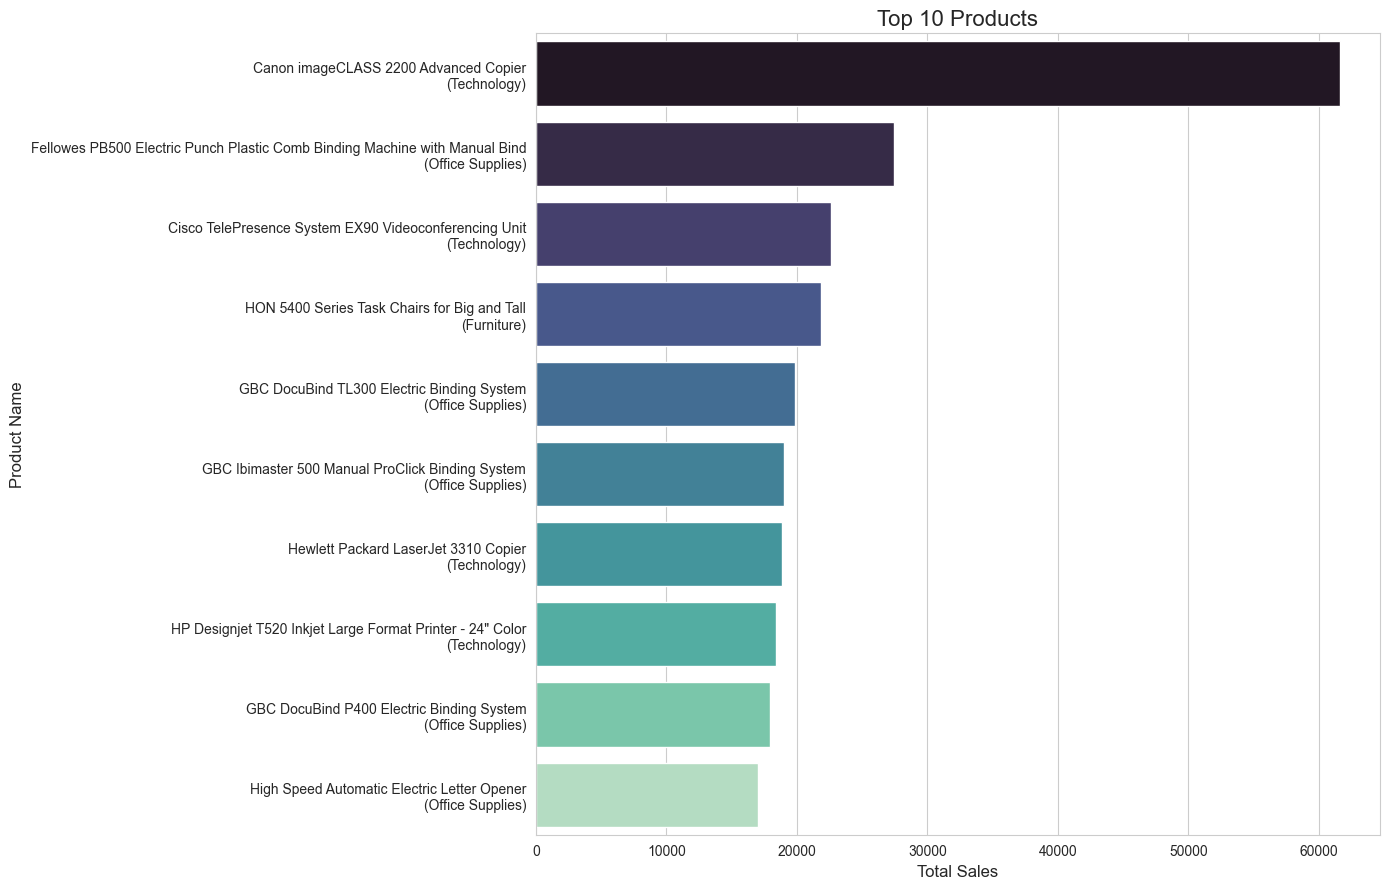

                                        Product Name         Category  \
0              Canon imageCLASS 2200 Advanced Copier       Technology   
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
2  Cisco TelePresence System EX90 Videoconferenci...       Technology   
3       HON 5400 Series Task Chairs for Big and Tall        Furniture   
4         GBC DocuBind TL300 Electric Binding System  Office Supplies   
5   GBC Ibimaster 500 Manual ProClick Binding System  Office Supplies   
6               Hewlett Packard LaserJet 3310 Copier       Technology   
7  HP Designjet T520 Inkjet Large Format Printer ...       Technology   
8          GBC DocuBind P400 Electric Binding System  Office Supplies   
9        High Speed Automatic Electric Letter Opener  Office Supplies   

       Sales  
0  61599.824  
1  27453.384  
2  22638.480  
3  21870.576  
4  19823.479  
5  19024.500  
6  18839.686  
7  18374.895  
8  17965.068  
9  17030.312  


In [131]:
top_10_products_with_category = df.groupby(['Product Name', 'Category'])['Sales'].sum().nlargest(10).reset_index()

top_10_products_with_category['Product_Category_Label'] = top_10_products_with_category['Product Name'] + '\n(' + top_10_products_with_category['Category'] + ')'

top_10_products_with_category = top_10_products_with_category.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(14, 9)) 
sns.barplot(x='Sales', y='Product_Category_Label', data=top_10_products_with_category, palette='mako')
plt.title('Top 10 Products', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print(top_10_products_with_category[['Product Name', 'Category', 'Sales']])

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/803122547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=sales_by_ship_mode, palette='cubehelix')


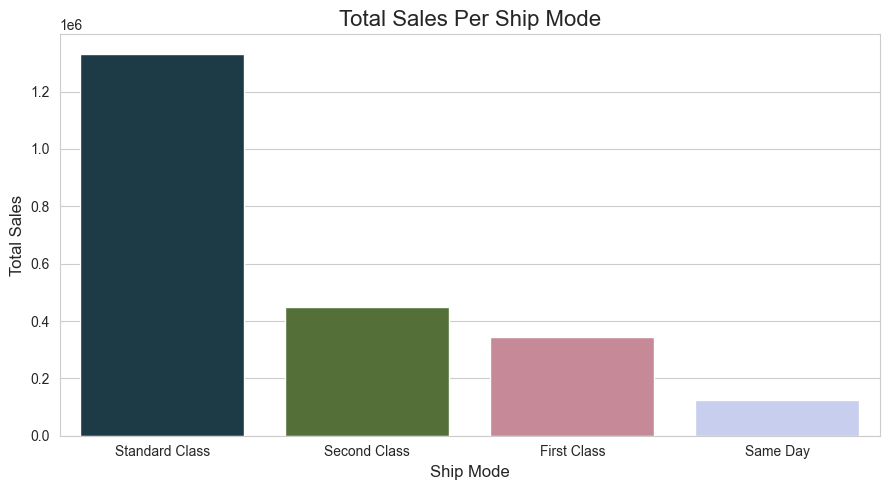

Total Sales By Ship Mode:
        Ship Mode         Sales
0  Standard Class  1.332617e+06
1    Second Class  4.491990e+05
2     First Class  3.455723e+05
3        Same Day  1.252190e+05


In [132]:
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Ship Mode', y='Sales', data=sales_by_ship_mode, palette='cubehelix')
plt.title('Total Sales Per Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Total Sales By Ship Mode:")
print(sales_by_ship_mode)

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/2656164483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=sales_by_region, palette='YlGnBu')


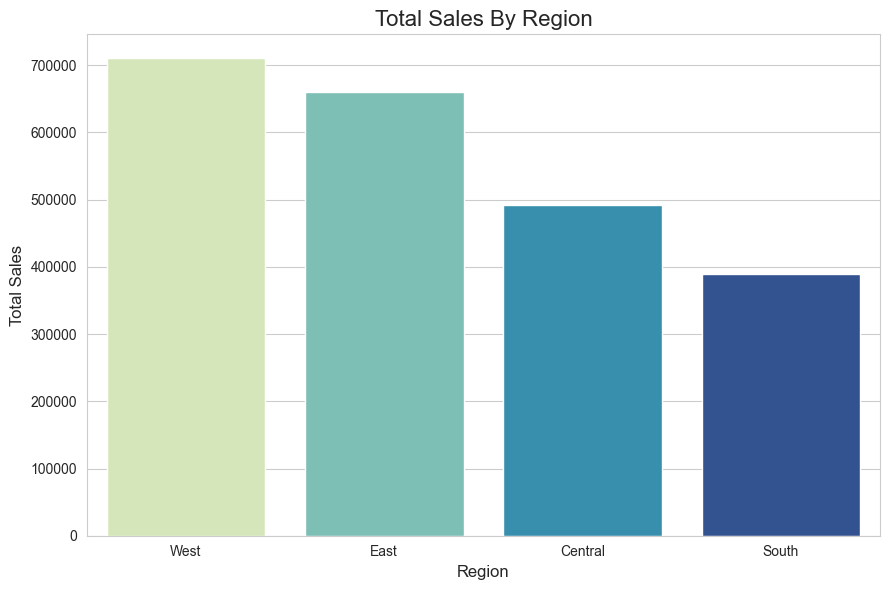

Total Sales By Region:
    Region        Sales
0     West  710219.6845
1     East  660589.3560
2  Central  492646.9132
3    South  389151.4590


In [133]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Region', y='Sales', data=sales_by_region, palette='YlGnBu')
plt.title('Total Sales By Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Total Sales By Region:")
print(sales_by_region)

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_79254/3520619817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='Blues')


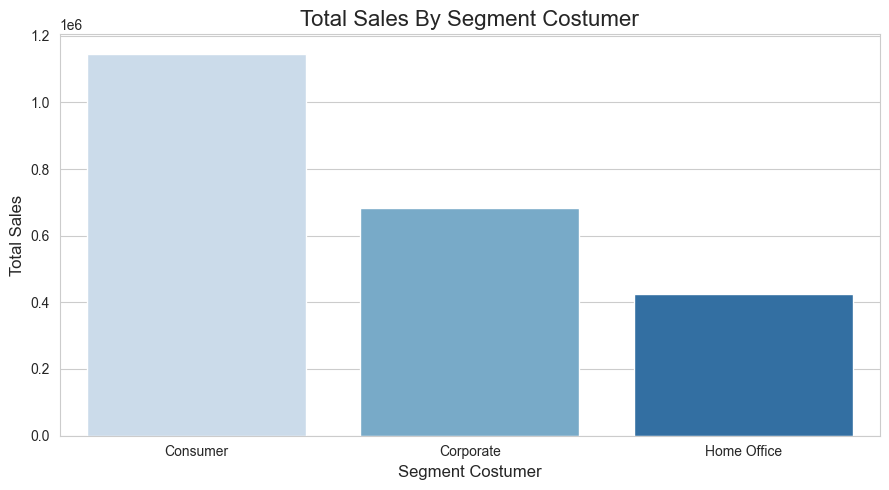

Total Sales By Segment Costumer:
       Segment         Sales
0     Consumer  1.146708e+06
1    Corporate  6.822118e+05
2  Home Office  4.236874e+05


In [134]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment, palette='Blues')
plt.title('Total Sales By Segment Costumer', fontsize=16)
plt.xlabel('Segment Costumer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Total Sales By Segment Costumer:")
print(sales_by_segment)